In [2]:
import skimage as ski
import numpy as np
from skimage.util import invert
from skimage.color import rgb2gray
%matplotlib inline
import matplotlib.pyplot as plt
import os
from skimage.morphology import skeletonize, thin

filename = 'cluster.png'
image = ski.io.imread(filename)
image = rgb2gray(image)
copied = image.copy()
print(np.shape(copied))
for r in range(4096):
    for i in range(4096):
        a = round(image[r][i],2)
        if a > 0.6:
            copied[r][i]= 1
        else:
            copied[r][i] = 0
print(image)
print(copied)

(4096, 4096)
[[0.83529412 0.83529412 0.83137255 ... 0.81176471 0.80392157 0.78823529]
 [0.83137255 0.83137255 0.83137255 ... 0.80392157 0.82745098 0.79607843]
 [0.83529412 0.83529412 0.83137255 ... 0.83921569 0.81960784 0.81568627]
 ...
 [0.83921569 0.83921569 0.83921569 ... 0.93333333 0.90980392 0.88235294]
 [0.83921569 0.83921569 0.83921569 ... 0.91372549 0.86666667 0.90980392]
 [0.84313725 0.84313725 0.83921569 ... 0.89411765 0.89803922 0.86666667]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


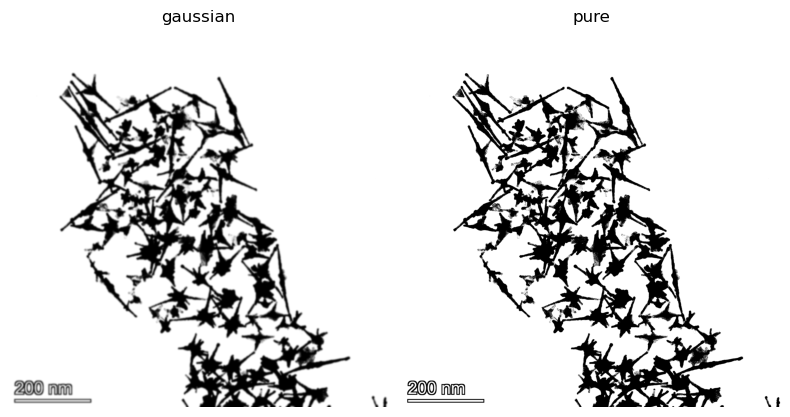

In [3]:
image = copied
for i in range(50):
    image = ski.filters.gaussian(image)

fig, axes = plt.subplots(1,2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('gaussian')
ax[0].axis('off')

ax[1].imshow(copied, cmap=plt.cm.gray)
ax[1].set_title('pure')
ax[1].axis('off')

fig.tight_layout()
plt.show()

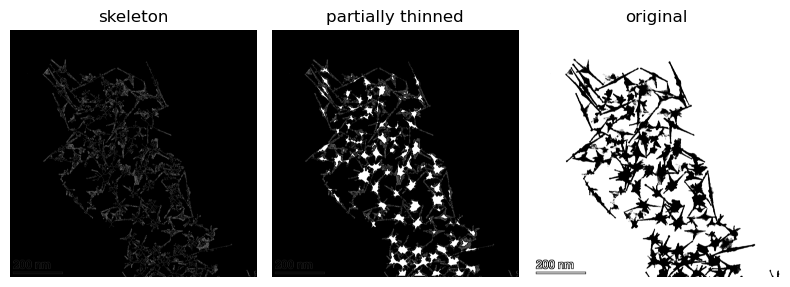

In [4]:
image = invert(copied)
skeleton = skeletonize(image)
thinned_partial = thin(image, max_num_iter=20)

fig, axes = plt.subplots(1,3, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(skeleton, cmap=plt.cm.gray)
ax[0].set_title('skeleton')
ax[0].axis('off')

ax[1].imshow(thinned_partial, cmap=plt.cm.gray)
ax[1].set_title('partially thinned')
ax[1].axis('off')

ax[2].imshow(invert(image), cmap=plt.cm.gray)
ax[2].set_title('original')
ax[2].axis('off')


fig.tight_layout()
plt.show()

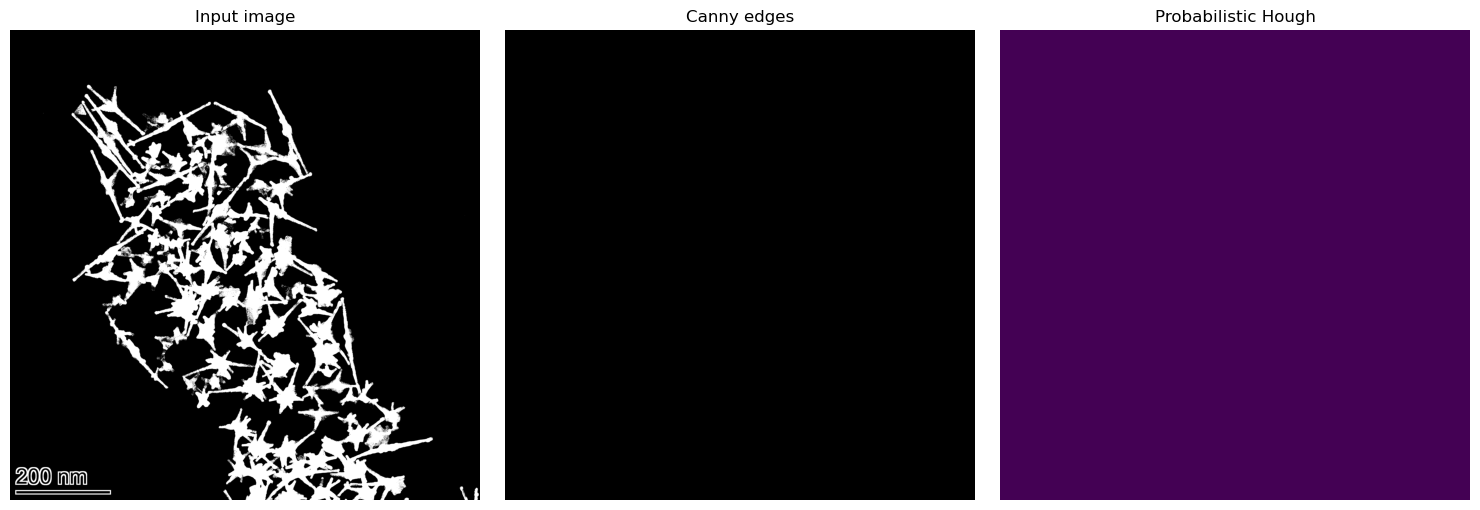

In [7]:
from skimage.transform import probabilistic_hough_line
from skimage.feature import canny

# Line finding using the Probabilistic Hough Transform
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [17]:

#image = np.array(skeleton)
scaled_image = (image ^ np.min(image)) / (np.max(image) ^ np.min(image)) * 255
image_uint8 = scaled_image.astype(np.uint8)
ski.io.imsave('output.png', image_uint8)